In [11]:
import numpy as np

# Weights
weights = [0.297, 0.025, 0.035, 0.076, 0.154, 0.053, 0.104, 0.017, 0.025, 0.214]

# Load Criterion Type: 'max' or 'min'
criterion_type = ['max', 'max', 'max', 'max', 'max', 'max', 'max', 'max', 'min', 'min']

# Dataset
dataset = np.array([
                    [3.5, 6, 1256, 4, 16, 3, 17.3, 8, 2.82, 4100],   #a1
                    [3.1, 4, 1000, 2, 8,  1, 15.6, 5, 3.08, 3800],   #a2
                    [3.6, 6, 2000, 4, 16, 3, 17.3, 5, 2.9,  4000],   #a3
                    [3,   4, 1000, 2, 8,  2, 17.3, 5, 2.6,  3500],   #a4
                    [3.3, 6, 1008, 4, 12, 3, 15.6, 8, 2.3,  3800],   #a5
                    [3.6, 6, 1000, 2, 16, 3, 15.6, 5, 2.8,  4000],   #a6
                    [3.5, 6, 1256, 2, 16, 1, 15.6, 6, 2.9,  4000]    #a7
                   ])

In [15]:
def moora_mcdm(dataset, weights, criterion_type):
    X = np.copy(dataset) / 1.0
    best = np.zeros(X.shape[1])
    
    for i in range(0, X.shape[1]):
        if criterion_type[i] == 'max':
            best[i] = np.max(X[:, i])
        else:
            best[i] = np.min(X[:, i])
    
    root = (np.sum(X**2, axis=0))**(1/2)
    X = X / root
    X = X * weights
    
    id1 = [i for i, j in enumerate(criterion_type) if j == 'max']
    id2 = [i for i, j in enumerate(criterion_type) if j == 'min']
    
    s_p = np.zeros(X.shape[0])
    s_m = np.zeros(X.shape[0])
    Y = np.zeros(X.shape[0])
    
    if len(id1) > 0:
        s_p = np.sum(X[:, id1], axis=1)
    
    if len(id2) > 0:
        s_m = np.sum(X[:, id2], axis=1)
    
    Y = s_p - s_m
    
    flow = np.copy(Y)
    flow = np.reshape(flow, (Y.shape[0], 1))
    flow = np.insert(flow, 0, list(range(1, Y.shape[0]+1)), axis=1)
    
    return flow

ranking = moora_mcdm(dataset, weights, criterion_type)
print("Ranking:", ranking)


Ranking: [[1.         0.22584754]
 [2.         0.13499372]
 [3.         0.23562927]
 [4.         0.15180478]
 [5.         0.20341201]
 [6.         0.20241021]
 [7.         0.18611914]]


In [3]:
from pyDecision.algorithm import moora_method

a1: 0.226
a2: 0.135
a3: 0.236
a4: 0.152
a5: 0.203
a6: 0.202
a7: 0.186


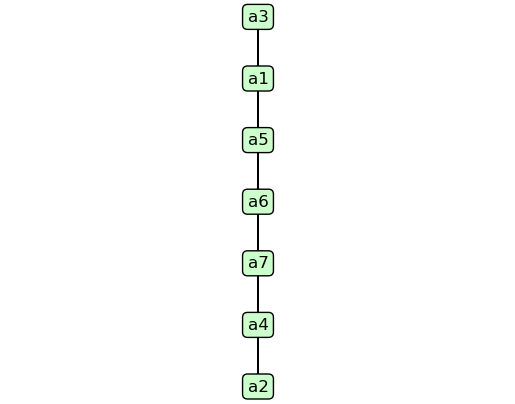

In [14]:
# Call MOORA Function
rank = moora_method(dataset, weights, criterion_type, graph = True, verbose = True)

In [16]:
rank[0]

array([3.        , 0.23562927])